# Notebook to compare to merlin

In [1]:
from os import walk
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cleanpath='../../../projects/speech_face_analysis/data/cifti/cleaned/smoothed/'

subject_flist = list(walk(cleanpath))[0][2:][0]

#load the cifti2 to steal the header
img_dir = '/om2/user/jsmentch/projects/speech_face_analysis/data/fitlins_cifti/fitlins/sub-19/'
img_name = 'sub-19_task-MerlinMovie_space-fsLR_contrast-faceAndSpeech_stat-t_statmap.dscalar.nii'
img = nb.load(img_dir+img_name)

#load union of 100% coverage
# union_ind = np.load('data/subject_union_ind.npy') #100% coverage of all sujbects
# data_remove = np.where(union_ind==1, 0, 1) # where there is data set to 0, elsewhere set to 1
# union_ind_ind=np.where(union_ind==1)

### load data for one subject

In [3]:
s_f = subject_flist[0]
sub = s_f[:6]
img = nb.load(cleanpath+str(s_f))
Y = img.get_fdata() #load data from nii
Y = Y[17:] #trim beginning, first 17 TRs
Y = Y[:1009] #trim end to end of film    braintrain.append(s_brain[:-200,:]) #roughly 80 20 split, trim the last 200 TRs of each subject to save as test set
#X = X[:,union_ind_ind[0]]
Y = np.nan_to_num(Y)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

#Y= scaler.fit_transform(Y)
    

In [4]:
Y.shape

(1009, 91282)

In [5]:
tr=1.5
n_scans=1009

In [6]:
x_raw = np.load('../../../data/yamnet_output/merlin_yamnet_scores.npy')

In [7]:
from scipy.signal import resample
X = resample(x_raw, Y.shape[0], axis=0)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [8]:
X.shape

(1009, 521)

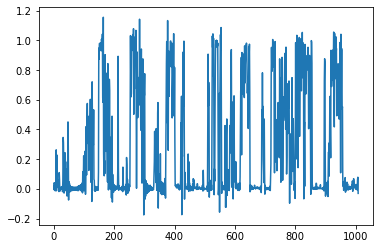

In [9]:
plt.plot(X[:,0])

In [10]:
from analysis import simple_ridgeCV
scores_mean,corr_mean,weights_mean = simple_ridgeCV(X,Y)

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean

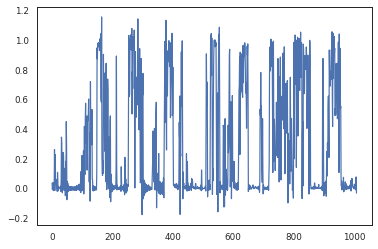

In [11]:
plt.plot(X[:,0])

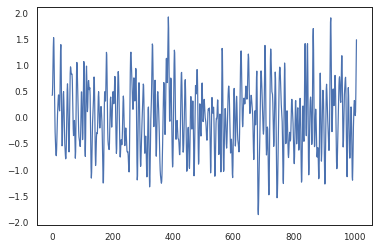

In [13]:
plt.plot(Y[:,0])

Text(0, 0.5, '# voxels')

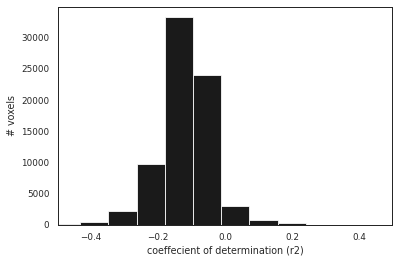

In [14]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('coeffecient of determination (r2)')
plt.ylabel('# voxels')

Text(0, 0.5, '# voxels')

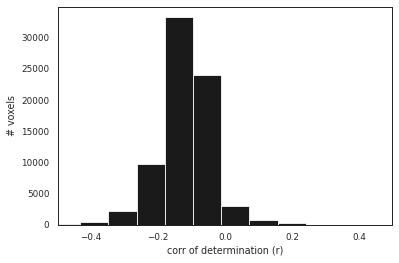

In [109]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('corr of determination (r)')
plt.ylabel('# voxels')

In [23]:
feature='as'
subject=sub

In [31]:
plot_32k_results(scores_mean,'r2',subject,feature,'encoding')

/om2/vast/gablab/jsmentch/projects/nat_img/code/nilearn_plotting_custom.py:184: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]
[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]


In [28]:
import numpy as np
import nibabel as nb
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from nilearn_plotting_custom import plot_surf
from PIL import Image
from PIL import ImageDraw
import npp
import hcp_utils as hcp
from hcp_tools import load_flatmaps_59k
from hcp_tools import load_meshes
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("paper", "white")
#%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
def plot_32k_results(scores,score_type,subject,feature,title):
    if score_type == 'r2':
        v=[0,0.5]
        threshold=None
        symmetric_cmap=False
        cmap='inferno'
    if score_type == 'r':
        v=[0,1]
        threshold=None
        symmetric_cmap=False
        cmap='inferno'
    if score_type == 'p':
        v=[0,0.05]
        symmetric_cmap=False
        cmap='inferno'
    if score_type == 'z':
        v=[-10,10]
        threshold=3
        symmetric_cmap=True
        cmap='cold_hot'
    if score_type == 'd':
        v=[0,10]
        threshold=3
        symmetric_cmap=True
        cmap='inferno'
    if score_type == 'raw':
        v=[-10,10]
        threshold=1
        symmetric_cmap=True
        cmap='cold_hot'
    figpath=f'../outputs/figures/merlin/{score_type}'
    save_dir=f'{figpath}/{title}{str(subject)}_{feature}'
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
#     flatmeshes=load_flatmaps_59k() #load flatmaps
#     surf_path_msm = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.L.inflated_1.6mm_MSMAll.59k_fs_LR.surf.gii'
#     mesh59k_msm = load_meshes(example_filename=surf_path_msm) #load other meshes
    # get data from results in plotting format
    score_cortex_dataL = hcp.left_cortex_data(scores, fill=0)
    score_cortex_dataR = hcp.right_cortex_data(scores, fill=0)
#     # sulcal depth paths
#     sulc_left = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/MNINonLinear/fsaverage_LR59k/100610.L.sulc.59k_fs_LR.shape.gii'
#     sulc_right = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/MNINonLinear/fsaverage_LR59k/100610.R.sulc.59k_fs_LR.shape.gii'
#     # params for view to plot
    params = [('flat_L',score_cortex_dataL,hcp.mesh.flat_left,hcp.mesh.sulc_left,'left'),\
     ('flat_R',score_cortex_dataR,hcp.mesh.flat_right,hcp.mesh.sulc_right,'right'),\
     ('vinf_L',score_cortex_dataL,hcp.mesh.very_inflated_left,hcp.mesh.sulc_left,'left'),\
     ('vinf_R',score_cortex_dataR,hcp.mesh.very_inflated_right,hcp.mesh.sulc_right,'right'),\
    ]
    # plot each hemi and mesh, save to outputs dir
    for name, data, mesh, sulc, hemi in params:
        plot_surf(mesh,\
                data, \
                  cmap=cmap,symmetric_cmap=symmetric_cmap, avg_method='median',#figure=fig,\
                bg_map=sulc, colorbar=True, vmin=v[0], vmax=v[1], threshold=threshold, hemi=hemi, \
                data_alpha=np.where(data>0,1,0),\
                data_remove=np.zeros(data.shape),output_file=f'{save_dir}/{name}.png')

    #combine saved maps into one with PIL
    area = (75, 140, 635, 560) #area to crop from each image

    img = Image.open(f'{save_dir}/flat_L.png')
    cropped = img.crop(area)
    fL=cropped.transpose(Image.FLIP_LEFT_RIGHT)
    w,h = img.size
    c_area = (690, 0, w-10, h) # area of colorbar to crop
    cbar = img.crop(c_area)

    img = Image.open(f'{save_dir}/flat_R.png')
    fR = img.crop(area)

    img = Image.open(f'{save_dir}/vinf_L.png')
    iL = img.crop(area)
    #iL=cropped.transpose(Image.FLIP_LEFT_RIGHT)

    img = Image.open(f'{save_dir}/vinf_R.png')
    iR = img.crop(area)

    w,h=iR.size

    new_im = Image.new('RGB', ( (w*2)+70 , h*2) ,(255, 255, 255, 1))
    new_im.paste(fL,(0,h))
    new_im.paste(fR,(w,h))
    new_im.paste(iL,(0,0))
    new_im.paste(iR,(w,0))
    new_im.paste(cbar,(w*2,int(round(h/4))))

    w,h=new_im.size

    draw = ImageDraw.Draw(new_im)
    draw.text((0,0),f"{title}_{subject}_{feature}",(0,0,0))

    new_im.save(f'{save_dir}/../{title}_{subject}_{feature}.png')

In [15]:
import hcp_utils as hcp

In [ ]:
hcp.mesh.